# Data Scientist Salary (2020 - 2022) - Visualization

This notebook was created to visualize a data set about the data scientist salary from 2020 to 2022. The dataset was retrieved from Kaggle from the following link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download

The dataset collected data science related job titles, salary, level, currency, location, remote ratio. 

In this notebook, we will be doing some basic exploratory data analysis to see if there are any patterns and trends for these 2 years.

## 1. Import data

In [1]:
# Import some basic packages for the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data first as dssalary
dssalary = pd.read_csv('ds_salaries.csv',index_col=0)
dssalary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Check data types and null values to see if there are any missing data. If so, we need to do some data wrangling to make sure they are in a good shape. 

In [3]:
dssalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


Great! There is no null values in this dataset. As a result, there is no need to do any data cleaning to this dataset. 

Next, we can explore some basic stats for the dataset.

In [4]:
dssalary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


As we can see, the salary for data scientist between 2020 to 2022 is between 2.8K USD to 600K USD. 2.8K USD seems to be too little for an annual salary, but keep in mind that the jobs also include freelancer, part-time, and contract, which can vary a lot.

In [5]:
dssalary['employment_type'].value_counts().sort_values(ascending=False)

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

As we can see, most of the jobs in the list are full time. In the next chapter, we can do a quick analysis of different employment types first, and then remove the types other than full-time, to focus on the Full-Time Jobs.

## 2 Data Analysis

### 2.1 Employment Types vs. Average Salary


Text(0, 0.5, 'salary in USD')

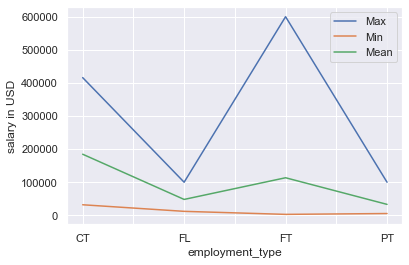

In [6]:
# Create a new dataset that group
employment_max = dssalary.groupby(by='employment_type')['salary_in_usd'].max()
employment_min = dssalary.groupby(by='employment_type')['salary_in_usd'].min()
employment_mean = dssalary.groupby(by='employment_type')['salary_in_usd'].mean()

sns.set_theme()
ds_employment = pd.DataFrame({'Max':employment_max, 'Min':employment_min, 'Mean': employment_mean})
ds_employment.plot()
plt.ylabel('salary in USD')

As we can see in the above chart, Contract and Full-Time  will have greater range of salaries, while Freelancer and Part-time have less. Contract has the largest avgerage salary but Full-Time has the largest maximum salary.

In [7]:
# Create a new dataset "ftds" as full-time data scientist
ftds = dssalary[dssalary['employment_type']=='FT']
ftds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

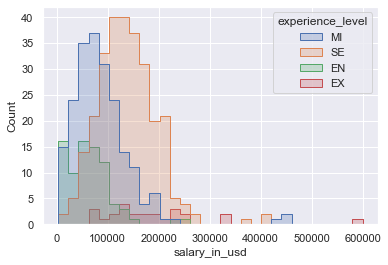

In [18]:
# A histplot to explore the distribution of each level of role in data science
sns.histplot(ftds, x="salary_in_usd", element="step", hue='experience_level')

We can conclude that the market has more middle level and senior level data scientist, but less entry level data scientist. Executive-level DS is very few. Experienced The middle level DSs receive less senior. 

### 2.2 Work Year

In this chapter, we will examine the work_year versus the salary in usd for full-time data scientists.

/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_45506/914481522.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


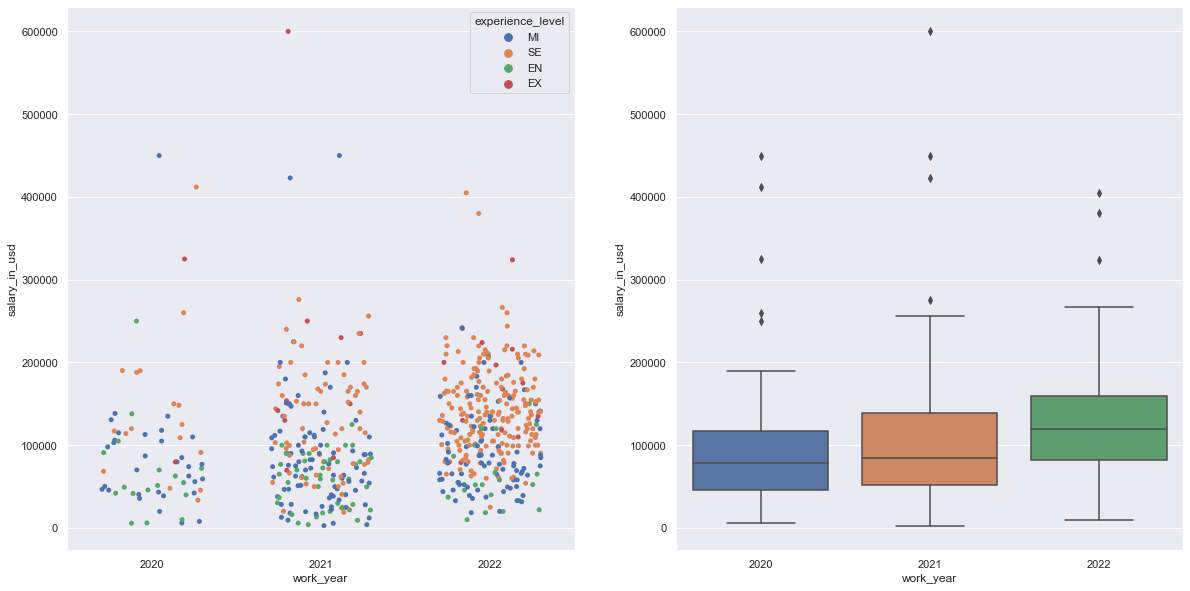

In [10]:
# Set a row of 2 figures
fig, ax =plt.subplots(1,2,figsize=(20,10))
# Use stripplot to show density of each year with the differences in experiences levels
sns.stripplot(x="work_year", y="salary_in_usd", data=ftds, jitter=0.3, hue='experience_level', ax=ax[0])
# Use boxplot to see the median and deviations (distribution) of the salary level
sns.boxplot(x="work_year", y="salary_in_usd", data=ftds, ax=ax[1])

fig.show()

We can make a few conclusions from the above dataset:

1) 2020 has fewer samples than 2021, and 2022 has more samples than 2021, which possibly means the market has more data science related jobs (although we are not sure how the survey was completed, we assume that the survey was taken in the same time of the year and used the same method)

2) The largest dense area in 2020 to 2022 are increasing, which indicates that salary for most of the jobs are increasing

3) Executive roles, including senior roles, get more pay than junior roles (entry-level and medium-level) in 2020, 2021, and 2022

4) There were not much difference between entry level and intermediate level jobs, although intermediate level jobs more likely to get higher pay, they also get the lower pay as much as entry-level

5) The minimum salary has increased compared to 2020 and 2021

6) A data scientist get 600K USD in 2021, which is the highest pay in the dataset

7) Median salary is increasing over the years. They were below 100K in 2020 and 2021, but increased above 100K in 2022

### 2.3 Remote Ratio vs. Salary

Since Covid-19, the working patern has become working from home, and some companies even decalre permenant working form home. Is there any differences for remote working pattern and salary? Does the company size affect the remote ratio and salary?

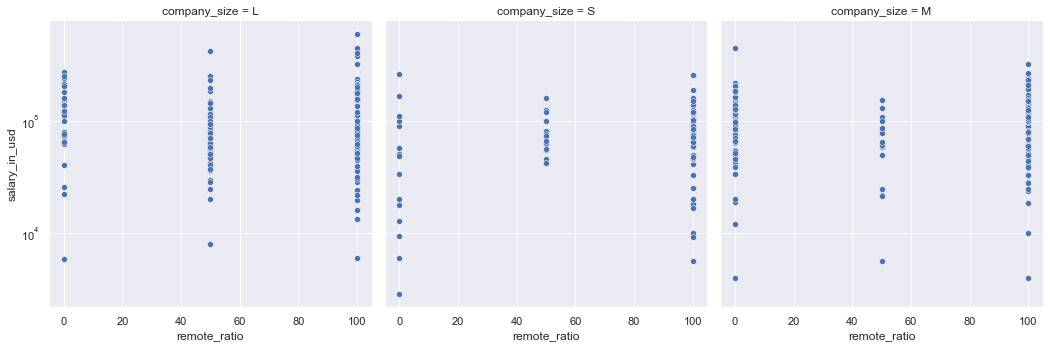

In [15]:
g = sns.relplot(
    data=ftds, x="remote_ratio", y="salary_in_usd",
    col="company_size",
    kind="scatter"
)
g.set(yscale="log")

There are definetely no relationship for remote ratio for large and medium size companies in salary. However, it is interesting to see that smaller companies' employees who worked 50% of their time at home have a narrower salary range in the middle. 

### 2.4 Countries vs. No. of Data Scientists

Country of residence and country of company may vary, as some of the employees work in a different country

<AxesSubplot:xlabel='company_location', ylabel='salary_in_usd'>

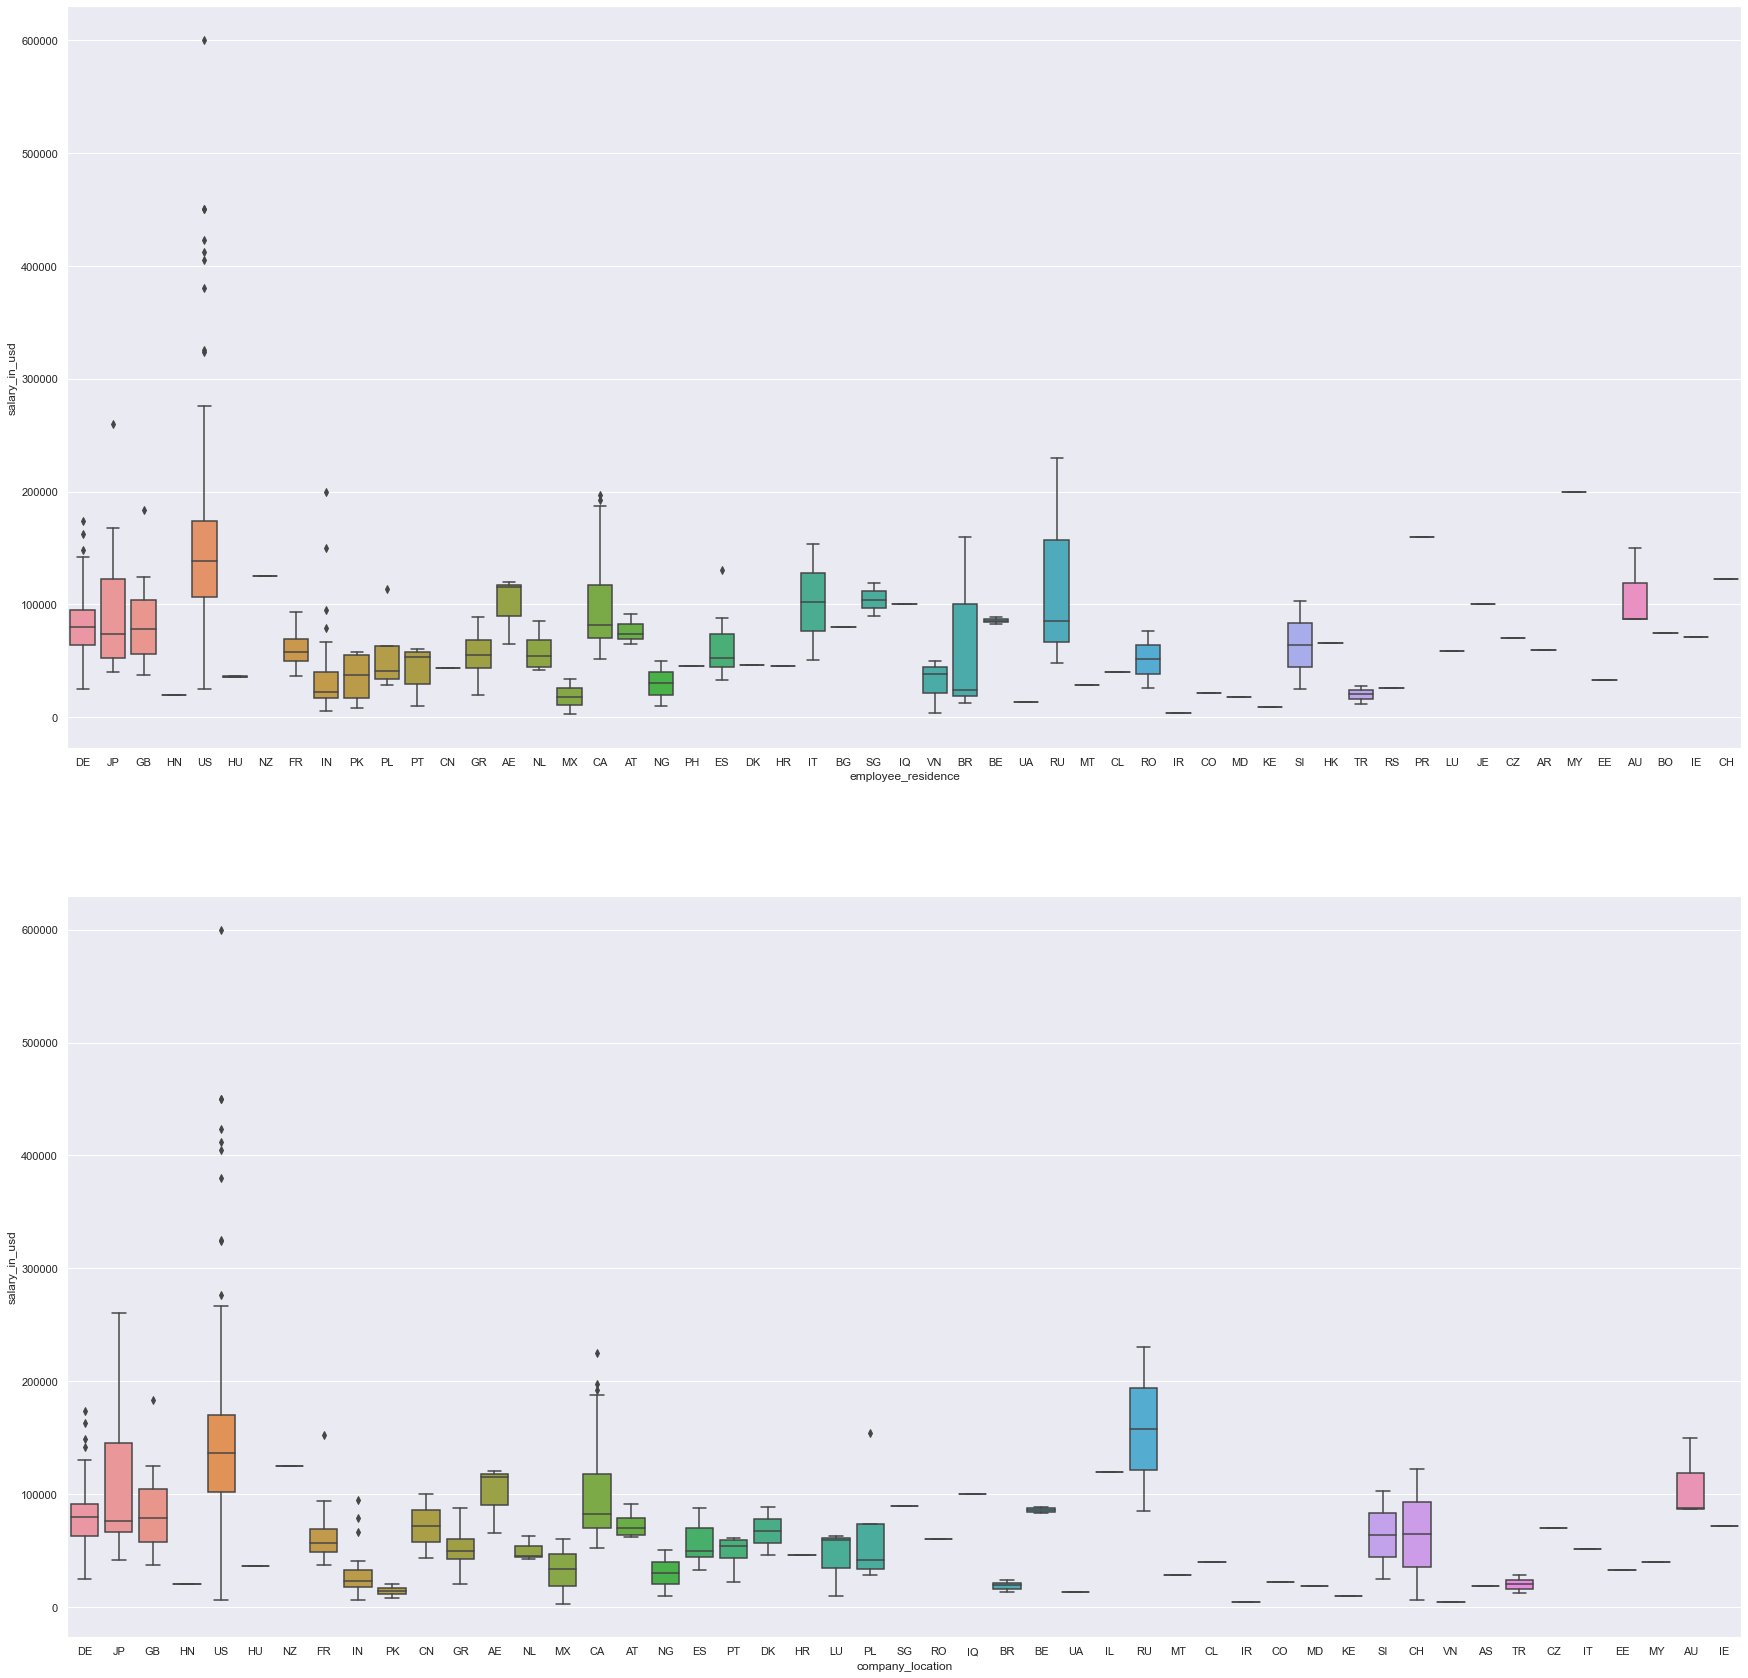

In [22]:
fig, ax =plt.subplots(2,1,figsize=(30,30))
sns.boxplot(x="employee_residence", y="salary_in_usd", data=ftds, ax=ax[0])
sns.boxplot(x="company_location", y="salary_in_usd", data=ftds, ax=ax[1])

There are definetely some differences for companies in Brazil and Russia, where it seems more people live in Russia and work for companies in other country. The same for Brazil.

Russia, US, Canada, Japan are the top contries, where DS make more than other contries. 